In [206]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [207]:
data_location = "app-review-scraper/data/scraped_game_data.json"

# Load JSON as a Python dict
with open(data_location, 'r', encoding='utf-8') as f:
    data = json.load(f)

data['1001244846'].keys()

dict_keys(['app_store_id', 'moby_name', 'app_store_name', 'developers', 'publisher', 'seller_name', 'release_date', 'target_age', 'average_user_rating', 'user_rating_count', 'reviews'])

In [208]:
# pick the columns you want
cols = [
    'app_store_id',
    'moby_name',
    'app_store_name',
    'developers',
    'publisher',
    'seller_name',
    'release_date',
    'target_age',
    'average_user_rating',
    'user_rating_count'
]

# convert dict-of-dicts to DataFrame
df = pd.DataFrame.from_dict(data, orient='index')[cols]

df.head()

,app_store_id,moby_name,app_store_name,developers,publisher,seller_name,release_date,target_age,average_user_rating,user_rating_count
518783884,518783884,"Spy Fox in ""Dry Cereal""",Spy Fox in Dry Cereal,"Humongous Entertainment, Inc.","Night Dive Studios, LLC, Tommo Inc., Infograme...",Tommo Inc.,2012-05-04T19:43:55Z,4+,3.74242,66
524474521,524474521,Putt-Putt Saves the Zoo,Putt-Putt Saves the Zoo Lite,"Humongous Entertainment, Inc.","Atari Europe S.A.S.U., Night Dive Studios, LLC...",Tommo Inc.,2012-05-22T00:24:16Z,4+,3.89474,57
699859911,699859911,Putt-Putt Joins the Circus,Putt-Putt Joins The Circus,"Humongous Entertainment, Inc.","Tommo Inc., Night Dive Studios, LLC, Humongous...",Tommo Inc.,2013-10-04T23:34:13Z,4+,3.94737,19
1007898303,1007898303,Putt-Putt Goes to the Moon,Putt-Putt Goes to the Moon,"Humongous Entertainment, Inc.","Humongous Entertainment, Inc., Night Dive Stud...",Tommo Inc.,2015-08-11T07:00:00Z,4+,3.42308,26
548954819,548954819,Putt-Putt Travels Through Time,Putt-Putt Travels Through Time,"Humongous Entertainment, Inc.","Tommo Inc., Akella, Night Dive Studios, LLC, H...",Tommo Inc.,2012-08-14T19:33:24Z,4+,3.43902,41


In [209]:
df[df['moby_name'] != df['app_store_name']]

,app_store_id,moby_name,app_store_name,developers,publisher,seller_name,release_date,target_age,average_user_rating,user_rating_count
518783884,518783884,"Spy Fox in ""Dry Cereal""",Spy Fox in Dry Cereal,"Humongous Entertainment, Inc.","Night Dive Studios, LLC, Tommo Inc., Infograme...",Tommo Inc.,2012-05-04T19:43:55Z,4+,3.74242,66
524474521,524474521,Putt-Putt Saves the Zoo,Putt-Putt Saves the Zoo Lite,"Humongous Entertainment, Inc.","Atari Europe S.A.S.U., Night Dive Studios, LLC...",Tommo Inc.,2012-05-22T00:24:16Z,4+,3.89474,57
699859911,699859911,Putt-Putt Joins the Circus,Putt-Putt Joins The Circus,"Humongous Entertainment, Inc.","Tommo Inc., Night Dive Studios, LLC, Humongous...",Tommo Inc.,2013-10-04T23:34:13Z,4+,3.94737,19
6451382835,6451382835,Beyond Blue,Zombie State: Survival game,E-Line Media,E-Line Media,MYGAMES MENA FZ LLC,2024-04-06T07:00:00Z,17+,4.62669,1259
875063456,875063456,Brain Challenge,Elevate - Brain Training Games,Gameloft Software Beijing Ltd.,"Gameloft Inc., Ubisoft Entertainment B.V., Gam...","Elevate Labs, LLC",2014-05-22T04:30:50Z,4+,4.77339,488554
...,...,...,...,...,...,...,...,...,...,...
1201287741,1201287741,World Geography,World Geography - Quiz Game,Atom Games Entertainment,Atom Games Entertainment,Martin Tomas,2017-03-08T14:43:21Z,4+,4.78019,3271
6474300843,6474300843,World of Peppa Pig,LEGO® DUPLO® Peppa Pig,Entertainment One UK Limited,Entertainment One UK Limited,StoryToys Limited,2024-05-30T07:00:00Z,4+,4.28613,18142
6444324057,6444324057,Zoo Dentist,Zoo Doctor Dentist : Game,Marionette Games,Prison Games Sp. z o. o.,Chung Nguyen,2022-12-07T08:00:00Z,4+,4.30220,6916
1228655110,1228655110,Zoo Guardians,Family Zoo: The Story,"Jumpstart Games, Inc.","Jumpstart Games, Inc.",Plarium LLC,2017-08-16T17:34:28Z,4+,4.28970,4484


In [210]:
bad_ids = [368677368, 454638411, 6451382835, 1524653663, 1629659821, 1528884134, 6747978391, 1234094465, 6461166332, 588145141,
           437707155, 6450904348, 944011620,1480319572, 310738695, 690169259, 6449203296, 454638411, 379693831, 6446415119, 368677368,
           293622097, 1670090810, 1069513131, 1149449468, 1480383173, 653508448, 933135994, 1518267642, 1093360165, 1604225544,
           969589921,709482991,1449482541,1614980927]
df = df[~df["app_store_id"].isin(bad_ids)]

In [211]:
def visualize_columns(df, columns):
    for col in columns:
        plt.figure(figsize=(15,5))

        # Popularity by game
        if col == "user_rating_count":
            top = df.sort_values(col, ascending=False).head(15)
            ax = top.plot(kind="barh", x="app_store_name", y=col, legend=False, figsize=(10,6))
            ax.set_xlabel("User Rating Count")
            ax.set_ylabel("Game")
            ax.set_title("Top 15 Most Popular Games")
            ax.invert_yaxis()
            plt.tight_layout()

        # Seller Name frequency
        elif col == "seller_name":
            pub_counts = df[col].value_counts().head(15).sort_values(ascending=True)
            pub_counts.plot(kind='barh', x='seller_name', y='count', legend=False)
            plt.xlabel("Seller Name")
            plt.ylabel("Number of Games")
            plt.title("Top 15 Sellers")

        # Average rating distribution
        elif col == "average_user_rating":
            plt.hist(df[col].dropna(), bins=10, edgecolor='black')
            plt.xlabel("Average User Rating")
            plt.ylabel("Frequency")
            plt.title("Distribution of Average Ratings")

        # Release trends
        elif col == "release_date":
            df[col] = pd.to_datetime(df[col], errors='coerce')
            release_counts = df[col].dt.year.value_counts().sort_index()
            ax = release_counts.astype(int).plot(kind='line', marker='o')  # grab the axis
            ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

            # extend y-axis by +5
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin, ymax + 5)

            plt.xlabel("Year")
            plt.ylabel("Number of Games")
            plt.title("Games Released Per Year")

        plt.tight_layout()
        plt.show()

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

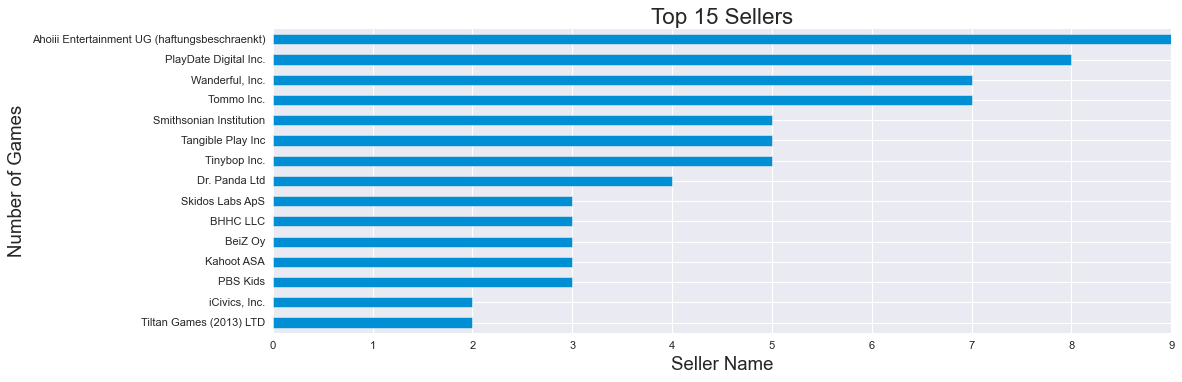

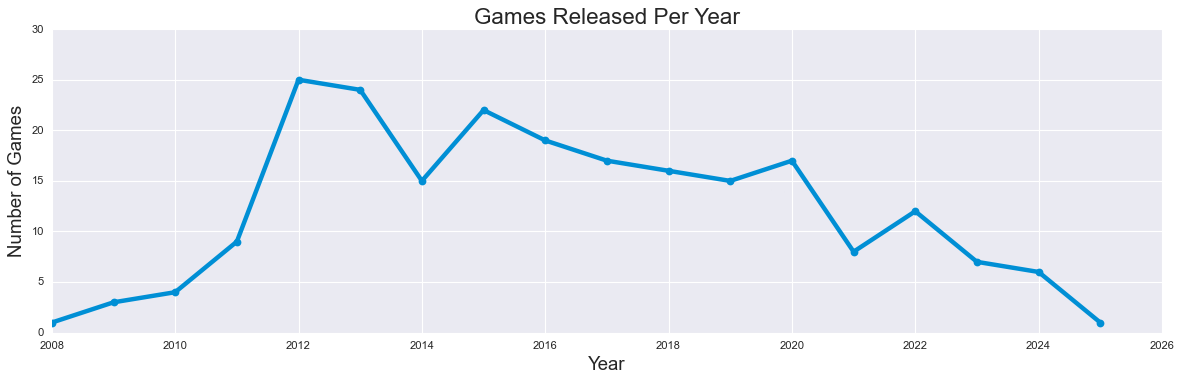

<Figure size 1200x400 with 0 Axes>

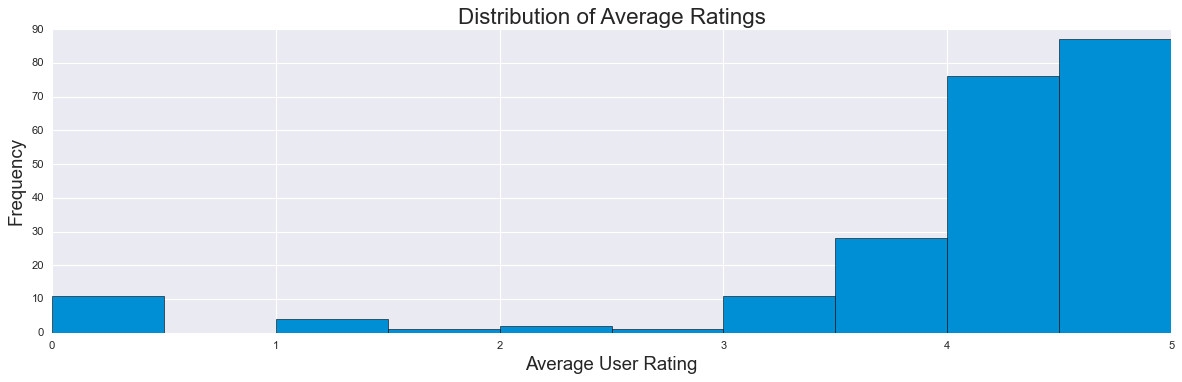

<Figure size 1200x400 with 0 Axes>

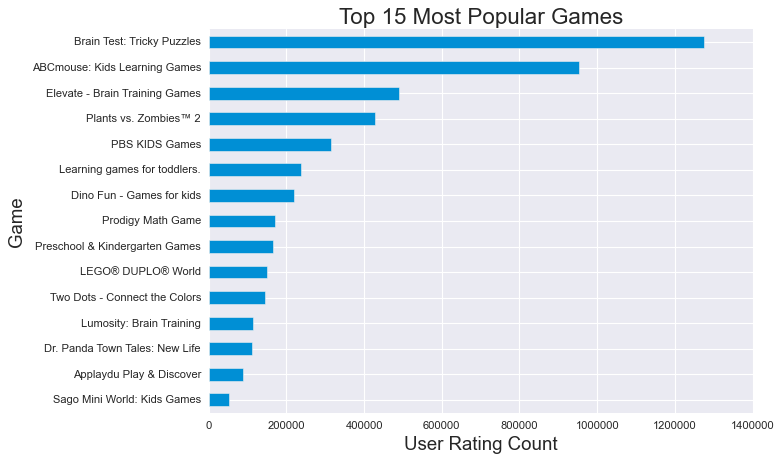

In [212]:
plt.style.use('seaborn-v0_8-darkgrid')
columns_to_visualize = [
    'developers',
    'publisher',
    'seller_name',
    'release_date',
    'target_age',
    'average_user_rating',
    'user_rating_count'
]

visualize_columns(df, columns_to_visualize) 